# Importing libraries

In [1]:
import plotly.graph_objects as go
from io import StringIO
import pandas as pd

# Loading data

In [177]:
privacy = pd.read_csv("data/privacy.csv")
bias = pd.read_csv("data/bias.csv")
trasparancy = pd.read_csv("data/transparency.csv")
risk = pd.read_csv("data/risk.csv")

Formatting the data

In [178]:
privacy.rename({"Unnamed: 0": "DOC", 
                "Q-0": "PD-1",
                "Q-1": "PD-2",
                "Q-2": "PD-3",
                "Q-3": "PD-4",
                "Q-4": "PD-5",
                "Q-5": "PD-6",
                "Q-6": "PD-7"}, axis='columns', inplace=True)

bias.rename({"Unnamed: 0": "DOC", 
                "Q-0": "DB-1",
                "Q-1": "DB-2",
                "Q-2": "DB-3",
                "Q-3": "DB-4",
                "Q-4": "DB-5",
                "Q-5": "DB-6",
                "Q-6": "DB-7",
                "Q-7": "DB-8",
                "Q-8": "DB-9",}, axis='columns', inplace=True)

trasparancy.rename({"Unnamed: 0": "DOC", 
                "Q-0": "TF-1",
                "Q-1": "TF-2",
                "Q-2": "TF-3",
                }, axis='columns', inplace=True)

risk.rename({"Unnamed: 0": "DOC", 
                "Q-0": "SR-1",
                "Q-1": "SR-2",
                "Q-2": "SR-3",
                "Q-3": "SR-4",
                "Q-4": "SR-5",
                "Q-5": "SR-6",
                "Q-6": "SR-7"}, axis='columns', inplace=True)

privacy.set_index('DOC', inplace=True)
bias.set_index('DOC', inplace=True)
trasparancy.set_index('DOC', inplace=True)
risk.set_index('DOC', inplace=True)

# Plotting the heatmap

In [116]:
def plot_heatmap(df):
    # Map the dataframe values to a numeric scale
    data_numeric = df.applymap(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
    
    # Plotly Heatmap
    fig = go.Figure(data=go.Heatmap(
        z=data_numeric,  # Data as is
        x=data_numeric.columns,  # Questions
        y=data_numeric.index,  # Documents
        colorscale=[(0, '#97BC62'), (0.5, '#FA6775'), (1, '#A1D6E2')],  # Corrected color scale
        showscale=False,  # Hide color scale bar
        hoverongaps=False,  # Show hover info even for "gaps" in the data
        xgap=3,  # Creates gaps between columns to simulate borders
        ygap=3,  # Creates gaps between rows to simulate borders
    ))
    
    # Customize the layout
    fig.update_layout(
        # title='Compliancy of AA Research on the Transparency and Fairness Guidelines',
        xaxis_title="Guidelines",
        yaxis_title="Document",
        legend_title="Compliancy",
        width=600,  # Adjust as needed
        height=1000,  # Adjust to display all documents properly
        margin=dict(t=50, l=50, b=50, r=50),  # Adjust margins to fit
    )
    
    # Adding custom legend for colors
    legend_labels = ['Yes', 'No', 'NA']
    legend_colors = ['#97BC62', '#FA6775', '#A1D6E2']
    
    for i, (label, color) in enumerate(zip(legend_labels, legend_colors)):
        fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                                 marker=dict(size=10, color=color),
                                 legendgroup=label, showlegend=True,
                                 name=label))
    
    fig.show()

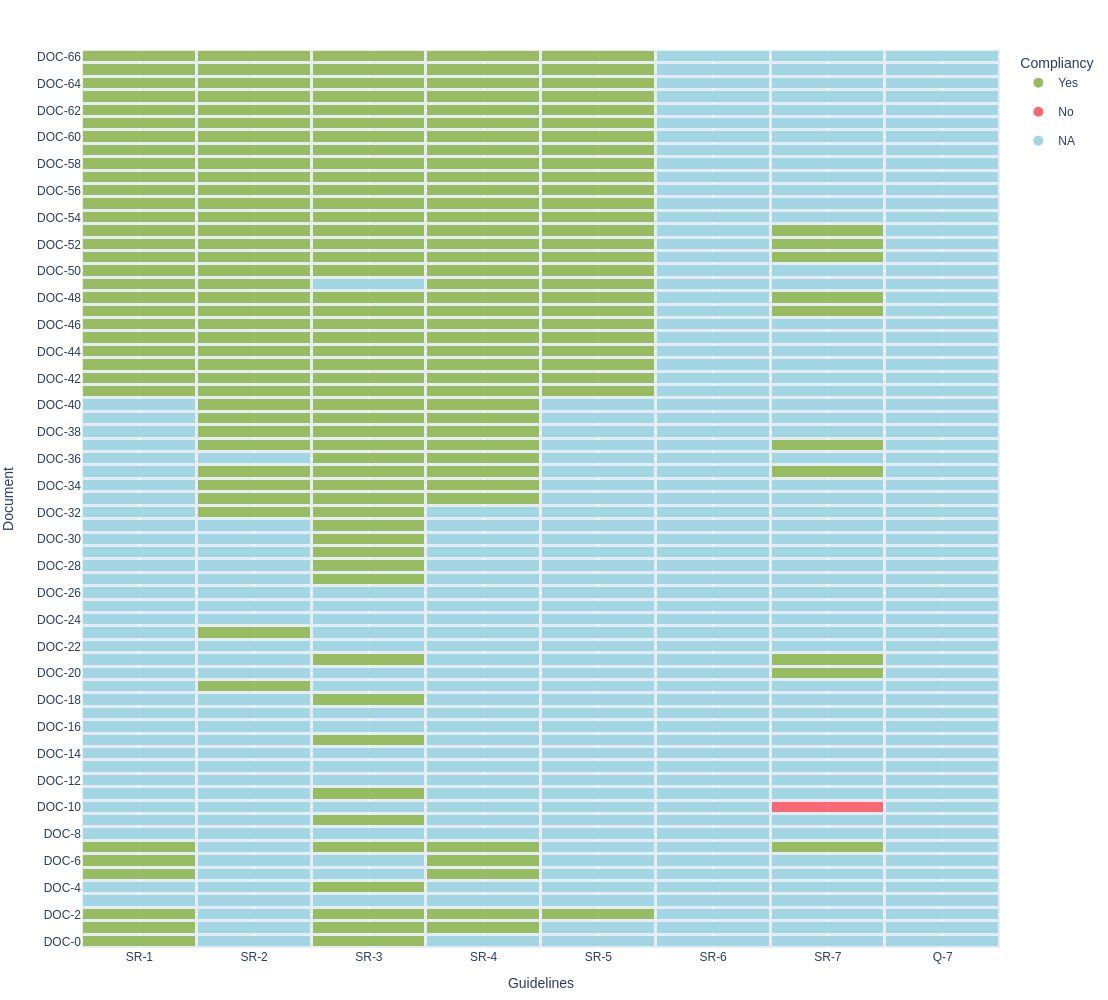

In [117]:
plot_heatmap(risk)

In [180]:
def plot_heatmap_1(df, generate_labels=True):
    # Map the dataframe values to a numeric scale
    data_numeric = df.applymap(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
    
    # Plotly Heatmap
    fig = go.Figure(data=go.Heatmap(
        z=data_numeric,  # Data as is
        x=data_numeric.columns,  # Questions
        y=data_numeric.index,  # Documents
        colorscale=[(0, '#97BC62'), (0.5, '#FA6775'), (1, '#A1D6E2')],  # Color scale
        showscale=False,  # Hide color scale bar
        hoverongaps=False,  # Show hover info even for "gaps" in the data
        xgap=3,  # Creates gaps between columns to simulate borders
        ygap=3,  # Creates gaps between rows to simulate borders
    ))
    
    # Customize the layout with increased title and legend font sizes
    fig.update_layout(
        title={
            'text': '(iv) Compliancy of Impact & Risk Guidelines',
            'x':0.5,
            'font': dict(size=20),  # Increase title font size here
        },
        legend_title_text='Compliancy',
        legend_title_font=dict(size=20),  # Increase legend title font size here
        legend_font=dict(size=18),  # Increase legend item font size here
        xaxis_title="Guidelines",
        yaxis_title="Document",
        width=600,
        height=1000,
        margin=dict(t=50, l=50, b=50, r=50),
    )

    fig.update_xaxes(title_text='Guidelines', title_font=dict(size=20))  # Set x-axis title font size
    fig.update_yaxes(title_text='Document', title_font=dict(size=20))    # Set y-axis title font size
    fig.update_yaxes(visible=False, showticklabels=False)
    
    # Adding custom legend for colors
    legend_labels = ['Yes', 'No', 'NA']
    legend_colors = ['#97BC62', '#FA6775', '#A1D6E2']

    for i, (label, color) in enumerate(zip(legend_labels, legend_colors)):
        fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                                 marker=dict(size=100000, color=color),
                                 legendgroup=label, showlegend=True,
                                 name=label))
    fig.show()

# Example usage with a DataFrame 'df'
# plot_heatmap(df)

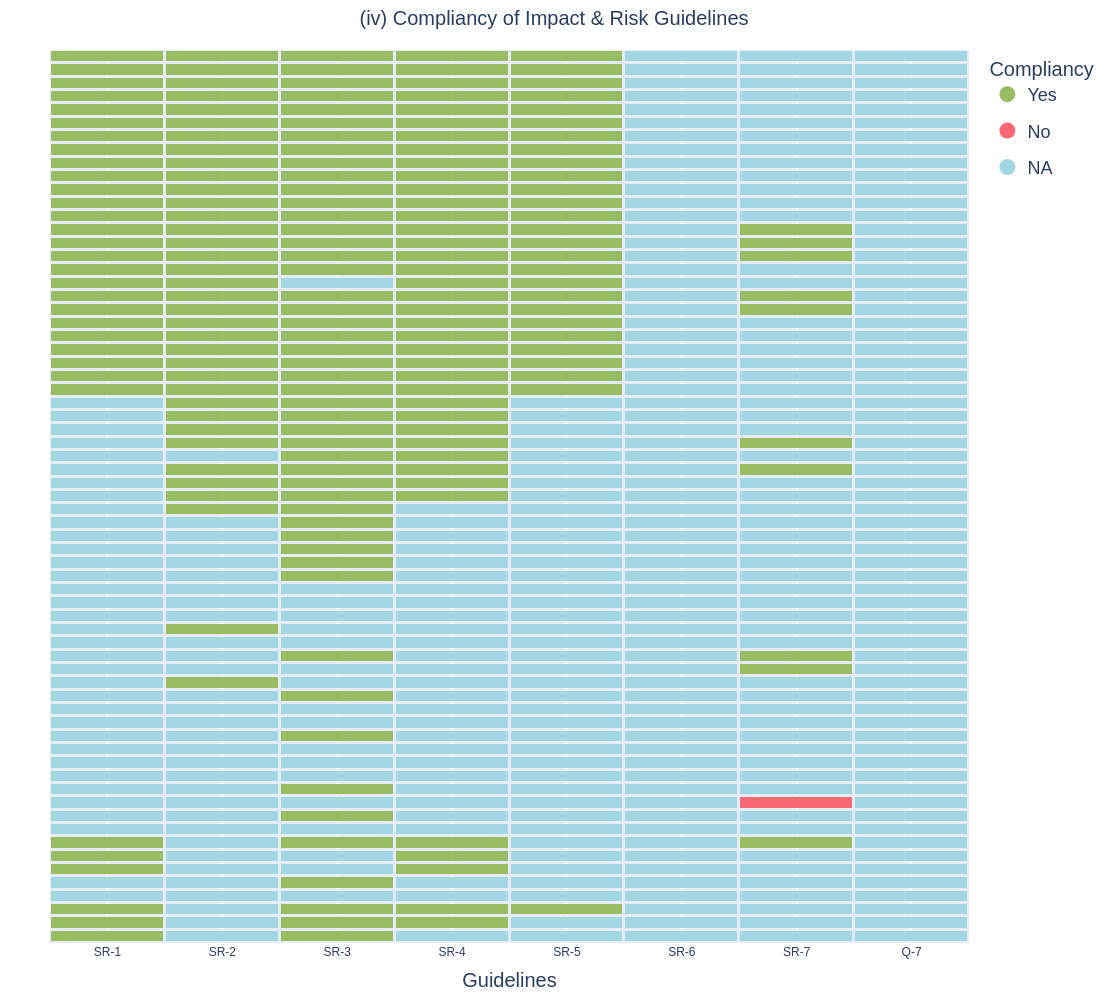

In [181]:
plot_heatmap_1(risk)